# **The fifth in-class-exercise (40 points in total, 04/12/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [11]:
# Importing Natural Language Toolkit -  nltk
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/n

True

In [12]:
# Importing pandas for Data analysis
import pandas as pd

In [13]:
# Reading training data set
training_data = open('stsa-train.txt').read()

In [14]:
# Reading test data set
test_data = open('stsa-test.txt').read()

In [15]:
# Formatting training data set
training_labels, training_text = [], []
for i, j in enumerate(training_data.split("\n")):
    c = j.split(' ')
    training_labels.append(c[0])
    training_text.append(" ".join(c[1:]))

In [16]:
# Formatting test data set
test_labels, test_text = [], []
for i, j in enumerate(test_data.split("\n")):
    c = j.split(' ')
    test_labels.append(c[0])
    test_text.append(" ".join(c[1:]))

In [17]:
# Creating Data Frame through pandas to build 2d array of data for Training data
training_data_frame = pd.DataFrame (list(zip(training_text, training_labels)) , columns = ['Raw Text', 'Labels'])

In [18]:
# Creating Data Frame through pandas to build 2d array of data for Test data
test_data_frame = pd.DataFrame (list(zip(test_text, test_labels)) , columns = ['Raw Text', 'Labels'])

In [19]:
# Removing missing values (if any)
test_data_frame = test_data_frame.dropna()

In [20]:
# Cleaning training data set
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')
st = PorterStemmer()
nltk.download('punkt')
stop = stopwords.words('english')

# Convert to Lower case
training_data_frame['After Lowercasing'] = training_data_frame['Raw Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove Punctuation
training_data_frame['After Removing Punctuation'] = training_data_frame['After Lowercasing'].str.replace('[^\w\s]','')

# Remove special characters
training_data_frame['After Removing special characters'] = training_data_frame['After Removing Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

# Remove stopwords
training_data_frame['After Removing Stopwords'] = training_data_frame['After Removing Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Perform Tokenization
training_data_frame['Tokenization'] = training_data_frame['After Removing Stopwords'].apply(lambda x: TextBlob(x).words)

# Perform Lemmatization
training_data_frame['After Lemmatization'] = training_data_frame['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.


In [21]:
# Cleaning test data set

# Convert to Lower case
test_data_frame['After Lowercasing'] = test_data_frame['Raw Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove punctuations
test_data_frame['After Removing Punctuation'] = test_data_frame['After Lowercasing'].str.replace('[^\w\s]','')

# Remove special characters
test_data_frame['After Removing Special Characters'] = test_data_frame['After Removing Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

# Remove stopwords
test_data_frame['After Removing Stopwords'] = test_data_frame['After Removing Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Perform Tokenization
test_data_frame['Tokenization'] = test_data_frame['After Removing Stopwords'].apply(lambda x: TextBlob(x).words)

# Perform Lemmatization
test_data_frame['After Lemmatization'] = test_data_frame['Tokenization'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [22]:
# Importing TfidfVectorizer to perform Term Frequency(TF) and Inverse Document Frequency(IDF) on Data Sets
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# Convert a collection of raw documents of Training Data Set to a matrix of TF-IDF features
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
training_i_data_frame_vector = TfidfVectorizer(analyzer='word')
training_i_data_frame_vector.fit(training_data_frame['After Lemmatization'])
x_tfidf =  training_i_data_frame_vector.transform(training_data_frame['After Lemmatization'])

In [24]:
# Convert a collection of raw documents of Test Data Set to a matrix of TF-IDF features
testing_data_frame_vector = TfidfVectorizer(analyzer='word', vocabulary = training_i_data_frame_vector.vocabulary_)
testing_data_frame_vector.fit(test_data_frame['After Lemmatization'])
x_axis_test = testing_data_frame_vector.transform(test_data_frame['After Lemmatization'])
y_axis_test = test_data_frame['Labels']

In [25]:
# Adding get_metrics method

from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x_tfidf, training_data_frame['Labels'].values,test_size=0.2)

from sklearn import metrics
def get_metrics(predictions, test_data_y):
  acc = metrics.accuracy_score(predictions, test_data_y)
  prec = metrics.precision_score(predictions, test_data_y, pos_label='positive', average='micro')
  recall = metrics.recall_score(predictions, test_data_y, pos_label='positive', average='micro')
  f1 = metrics.f1_score(predictions, test_data_y, pos_label='positive', average='micro')
  return acc, prec, recall, f1

In [26]:
# Adding get_cross_validation_score method
from sklearn.model_selection import cross_val_score, KFold
def get_cross_validation_score(modelName, x, y):
  scoring = 'accuracy'
  kfold = KFold(10, random_state = 7,shuffle=True)
  cross_val = cross_val_score(modelName, x, y, cv=kfold).mean()
  return cross_val

In [27]:
# Navie Bayes - Validation Metrics
nbm = naive_bayes.MultinomialNB()
nbm.fit(train_x, train_y)
nbpvdata = nbm.predict(valid_x)
acc, prec, recall, f1 = get_metrics(nbpvdata, valid_y)
print("Accuracy is ", acc,"\nPrecision is",prec,"\nRecall is:",recall,"\nF1 is:",f1)

# Cross validation scores of Navie Bayes
nb_scores_mean = get_cross_validation_score(nbm, valid_x, valid_y)
print('Navie Bayes Cross Validation Score is ',nb_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.779783393501805 
Precision is 0.779783393501805 
Recall is: 0.779783393501805 
F1 is: 0.779783393501805
Navie Bayes Cross Validation Score is  0.6960744447919925


In [28]:
# Testing Metrics through Prediction
nbpt_data = nbm.predict(x_axis_test)
acc, prec, recall, f1 = get_metrics(nbpt_data, y_axis_test)
print("Accuracy is ", acc,"\nPrecision is",prec,"\nRecall is:",recall,"\nF1 is:",f1)

# Cross validation scores of MultinominalNB_Testing
testing_mean = get_cross_validation_score(nbm, x_axis_test, y_axis_test)
print('Navie Bayes Cross Validation Score is ', testing_mean)

Accuracy is  0.7969264544456641 
Precision is 0.7969264544456641 
Recall is: 0.7969264544456641 
F1 is: 0.7969264544456641
Navie Bayes Cross Validation Score is  0.7371044256290158


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [29]:
# Perform SVM - Validation Metrics
svm_model = svm.SVC()
svm_model.fit(train_x, train_y)
svm_predictions_validation_data = svm_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(svm_predictions_validation_data, valid_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation scores- svm
svm_mean = get_cross_validation_score(svm_model, valid_x, valid_y)
print('SVM Cross Validation Score is', svm_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.763898916967509 
Precision is 0.763898916967509 
Recall is: 0.763898916967509 
F1 is: 0.763898916967509
SVM Cross Validation Score is 0.6873787926180793


In [30]:
# Testing Metrics
svm_predictions_test_data = svm_model.predict(x_axis_test)
accuracy, precision, recall, f1 = get_metrics(svm_predictions_test_data, y_axis_test)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

# Cross validation scores of svm-testing
svm_test_scores_mean = get_cross_validation_score(svm_model, x_axis_test, y_axis_test)
print('SVM Cross Validation Score is {0}'.format(svm_test_scores_mean))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.7925356750823271 
Precision is 0.7925356750823271 
Recall is: 0.7925356750823271 
F1 is: 0.7925356750823271
SVM Cross Validation Score is 0.7239086050561461


In [31]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model.fit(train_x, train_y)
knn_predictions_valid_data = knn_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(knn_predictions_valid_data, valid_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

# Cross validation score
knn_scores_mean = get_cross_validation_score(knn_model, valid_x, valid_y)
print('KNN Cross Validation Score is', knn_scores_mean)

Accuracy is  0.7104693140794224 
Precision is 0.7104693140794224 
Recall is: 0.7104693140794224 
F1 is: 0.7104693140794224
KNN Cross Validation Score is 0.6758054426024398


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [32]:
# Testing Metrics
knn_predictions_test_data = knn_model.predict(x_axis_test)
accuracy, precision, recall, f1 = get_metrics(knn_predictions_test_data, y_axis_test)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

# Cross validation scores of Testing 
knn_test_scores_mean = get_cross_validation_score(knn_model, x_axis_test, y_axis_test)
print('KNN Cross Validation Score is', knn_test_scores_mean)

Accuracy is  0.7222832052689352 
Precision is 0.7222832052689352 
Recall is: 0.7222832052689352 
F1 is: 0.7222832052689353
KNN Cross Validation Score is 0.6361376328589443


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [33]:
# Add Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(train_x, train_y)
dt_predictions_valid_data = decision_tree_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(dt_predictions_valid_data, valid_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

#cross validation scores
decision_tree_scores_mean = get_cross_validation_score(decision_tree_model, valid_x, valid_y)
print('Decision Tree Cross Validation Score is',decision_tree_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.6404332129963899 
Precision is 0.6404332129963899 
Recall is: 0.6404332129963899 
F1 is: 0.6404332129963899
Decision Tree Cross Validation Score is 0.5855124595975394


In [34]:
# Testing Metrics
decision_tree_predictions_test_data = decision_tree_model.predict(x_axis_test)
accuracy, precision, recall, f1 = get_metrics(decision_tree_predictions_test_data, y_axis_test)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

# Cross validation score testing
decision_tree_test_scores_mean = get_cross_validation_score(decision_tree_model, x_axis_test, y_axis_test)
print('Decision Tree Cross Validation Score is', decision_tree_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.6558726673984633 
Precision is 0.6558726673984633 
Recall is: 0.6558726673984633 
F1 is: 0.6558726673984633
Decision Tree Cross Validation Score is 0.6267699513601153


In [35]:
# Import Random Forest for constructing a multitude of decision trees at training time
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(train_x, train_y)
random_forest_predictions_valid_data = random_forest_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(random_forest_predictions_valid_data, valid_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

# Cross validation score
random_forest_scores_mean = get_cross_validation_score(random_forest_model, valid_x, valid_y)
print('Random Forest Cross Validation Score is {0}'.format(random_forest_scores_mean))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.7148014440433214 
Precision is 0.7148014440433214 
Recall is: 0.7148014440433214 
F1 is: 0.7148014440433214
Random Forest Cross Validation Score is 0.6497706182879782


In [36]:
# Testing Metrics
random_forest_predictions_test_data = random_forest_model.predict(x_axis_test)
accuracy, precision, recall, f1 = get_metrics(random_forest_predictions_test_data, y_axis_test)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

# Cross validation score testing
random_forest_test_scores_mean = get_cross_validation_score(random_forest_model, x_axis_test, y_axis_test)
print('Random Forest Cross Validation Score is', random_forest_test_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.7272228320526893 
Precision is 0.7272228320526893 
Recall is: 0.7272228320526893 
F1 is: 0.7272228320526892
Random Forest Cross Validation Score is 0.6586260733801719


In [37]:
# Importing XGBoost - for collection of parameters that can be applied in the global scope
from xgboost import XGBClassifier
xg_boost_model = XGBClassifier()
xg_boost_model.fit(train_x, train_y)
xg_boost_predictions_valid_data = xg_boost_model.predict(valid_x)
accuracy, precision, recall, f1 = get_metrics(xg_boost_predictions_valid_data, valid_y)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

# Cross validation score
xg_boost_scores_mean = get_cross_validation_score(XGBClassifier(), valid_x, valid_y)
print('XG Boost Cross Validation Score is ', xg_boost_scores_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.6433212996389892 
Precision is 0.6433212996389892 
Recall is: 0.6433212996389892 
F1 is: 0.6433212996389892
XG Boost Cross Validation Score is  0.6186998227504953


In [38]:
# Testing
test_data_xg_boost_predictions = xg_boost_model.predict(x_axis_test)
accuracy, precision, recall, f1 = get_metrics(test_data_xg_boost_predictions, y_axis_test)
print("Accuracy is ", accuracy,"\nPrecision is",precision,"\nRecall is:",recall,"\nF1 is:",f1)

# Cross validation score testing
test_scores_xg_boost_mean = get_cross_validation_score(XGBClassifier(), x_axis_test, y_axis_test)
print('XG Boost Cross Validation Score is',test_scores_xg_boost_mean)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


Accuracy is  0.6481888035126235 
Precision is 0.6481888035126235 
Recall is: 0.6481888035126235 
F1 is: 0.6481888035126235
XG Boost Cross Validation Score is 0.6251035849396506


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [40]:
# Importing Natural Language Toolkit -  nltk
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!


True

In [41]:
# Importing pandas for Data analysis
import pandas as pd

(5000, 6)
(3422, 6)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


positive    2522
negative     900
Name: Rating, dtype: int64

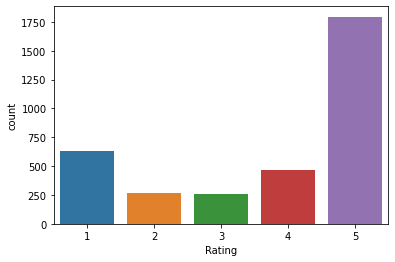

In [44]:
reviews = pd.read_csv("Amazon_Unlocked_Mobile.csv")
reviews = reviews.head(5000)
print(reviews.shape)
AfterRemoving_NullValues = reviews.dropna()
print(AfterRemoving_NullValues.shape)
import seaborn as sns
sns.countplot(AfterRemoving_NullValues.Rating)
# Perform Classification
def Classification_review(rating):
    if rating < 3:
        return 'negative'
    return 'positive'

Classification_rating = AfterRemoving_NullValues['Rating'].map(Classification_review) 
AfterRemoving_NullValues['Rating'] = Classification_rating
AfterRemoving_NullValues['Rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


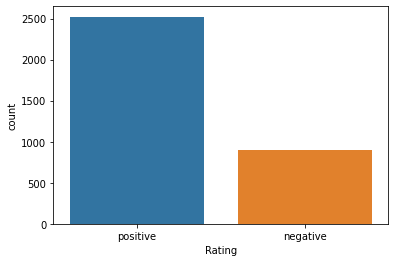

In [45]:
# Import seaborn for Statistical Data Visualization
import seaborn as sns
sns.countplot(AfterRemoving_NullValues.Rating)

In [46]:
# Perform Data pre processing
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
import re
c=0;
for i in AfterRemoving_NullValues['Reviews'].values:
    if (len(re.findall('<.*?>', i))):
        print(c)
        print(i)
        break;
    c += 1;

def clean_html_from_sentence(sentence):
    cleaned= re.compile('<.*?>')
    cleaned_text = re.sub(cleaned, ' ', sentence)
    return cleaned_text

# Convert to Lower case
AfterRemoving_NullValues['After Lowercasing'] = AfterRemoving_NullValues['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Clean unwanted html
AfterRemoving_NullValues['After Cleaning HTML'] = AfterRemoving_NullValues['After Lowercasing'].apply(lambda x: clean_html_from_sentence(x))

# Remove special characters
AfterRemoving_NullValues['Cleaned Text'] = AfterRemoving_NullValues['After Cleaning HTML'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

# Remove stop words
AfterRemoving_NullValues['Cleaned Text'] = AfterRemoving_NullValues['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [47]:
# Import CountVectorizer to convert a collection of text documents to a vector of term/token counts
from sklearn.feature_extraction.text import CountVectorizer
vector_count = CountVectorizer()

In [53]:
# Perform K Means Analysis
counted = vector_count.fit_transform(AfterRemoving_NullValues['Cleaned Text'].values)
column_names = vector_count.get_feature_names()
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10, init='k-means++', random_state=99)
model.fit(counted)

label = model.labels_
cc = model.cluster_centers_
print(cc)

from sklearn import metrics
ss = metrics.silhouette_score(counted, label, metric='euclidean')
print(ss)

data_frame = AfterRemoving_NullValues
data_frame['Bow Clus Label'] = model.labels_
data_frame.groupby(['Bow Clus Label'])['Reviews'].count()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[[0.0031348  0.         0.         ... 0.00089566 0.         0.        ]
 [0.00985915 0.00140845 0.0028169  ... 0.0028169  0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.02258065 0.         0.00645161 ... 0.00322581 0.00645161 0.00967742]
 [0.         0.         0.         ... 0.         0.         0.        ]]
0.19659068487820835


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Bow Clus Label
0    2233
1     710
2       1
3     141
4      20
5       3
6       1
7       1
8     310
9       2
Name: Reviews, dtype: int64

cluster ranking per each term
Cluster 0: phone
 great
 good
 works
 price
 screen
 like
 love
 work
 one
Cluster 1: phone
 great
 screen
 good
 one
 price
 work
 use
 would
 new
Cluster 2: phone
 issues
 great
 lte
 software
 good
 gps
 annoying
 youtube
 turned
Cluster 3: phone
 screen
 good
 use
 one
 like
 great
 battery
 sim
 camera
Cluster 4: phone
 screen
 like
 camera
 one
 battery
 good
 use
 would
 get
Cluster 5: phone
 screen
 data
 tracfone
 like
 android
 alcatel
 good
 really
 time
Cluster 6: phone
 note
 one
 even
 would
 sd
 dollar
 compared
 card
 screen
Cluster 7: phone
 quality
 good
 one
 like
 moto
 camera
 light
 display
 experience
Cluster 8: phone
 screen
 good
 great
 one
 like
 camera
 would
 battery
 get
Cluster 9: phone
 camera
 like
 idol
 sound
 one
 screen
 feature
 use
 price


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


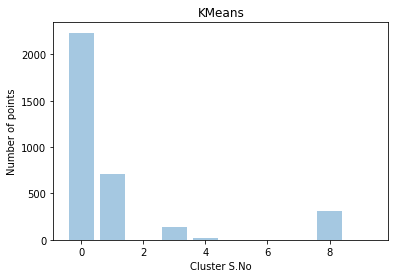

In [54]:
print("cluster ranking per each term")
order = model.cluster_centers_.argsort()[:, ::-1]
terms_count = vector_count.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order[i, :10]:
        print(' %s' % terms_count[ind], end='')
        print()

import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], data_frame.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans')
plt.xlabel("Cluster S.No")
plt.ylabel("Number of points")
plt.show()

In [55]:
l = []
for i in AfterRemoving_NullValues['Cleaned Text'].values:
    l.append(i.split())

import gensim
w_v_model=gensim.models.Word2Vec(l,size=100, workers=4)


import numpy as np
vector_sentence = []
for i in l:
  sentence_vector = np.zeros(100)
  count = 0
  for word in i:
    try:
      vec = w_v_model.wv[word]
      sentence_vector += vec
      count += 1
    except:
      pass
  sentence_vector /= count
  vector_sentence.append(sentence_vector)
vector_sentence = np.array(vector_sentence)
vector_sentence = np.nan_to_num(vector_sentence)
vector_sentence.shape

num_clus = [x for x in range(3,11)]
num_clus


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


[3, 4, 5, 6, 7, 8, 9, 10]

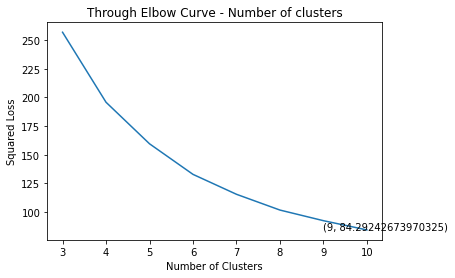

Minimal Clusters count obtained is -  9
Each Minimal Cluster Loss is -  84.29242673970325


In [56]:
error= []
for i in num_clus:
    kmeans = KMeans(n_clusters = i).fit(vector_sentence)
    error.append(kmeans.inertia_)
    
minimal_cluster = np.argmin(error) + 2 
plt.plot(num_clus, error)
plt.title("Through Elbow Curve - Number of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Squared Loss")
xy = (minimal_cluster, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("Minimal Clusters count obtained is - ", minimal_cluster)
print ("Each Minimal Cluster Loss is - ", min(error))

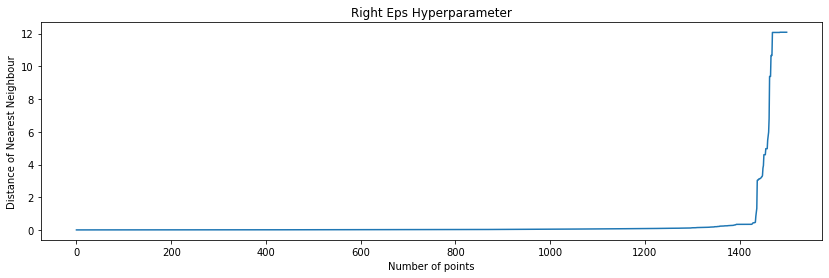

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,3422,3422,3422


In [57]:
# Perform DBSCAN CLUSTERING

from sklearn.cluster import DBSCAN
minPts = 2 * 100
def get_lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def get_nearest_neighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(get_lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

neighbour = []
for i in vector_sentence[:1500]:
    neighbour.append( get_nearest_neighbour(i, vector_sentence[:1500]) )
neighbour.sort()

plt.figure(figsize=(14,4))
plt.title("Right Eps Hyperparameter")
plt.plot([x for x in range(len(neighbour))], neighbour)
plt.xlabel("Number of points")
plt.ylabel("Distance of Nearest Neighbour")
plt.show()

model_1 = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model_1.fit(vector_sentence)

dbscan_cluster = data_frame
dbscan_cluster['AVG-W2V Clus Label'] = model_1.labels_
dbscan_cluster.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

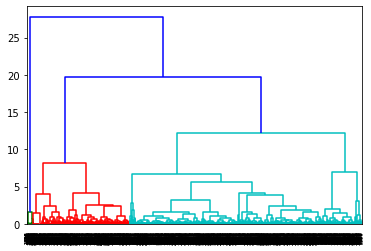

In [58]:
# Perform Hierarchical clustering
import scipy
from scipy.cluster import hierarchy
hirera_cluster=hierarchy.dendrogram(hierarchy.linkage(vector_sentence, method='ward'))
plt.axhline(y=35)

In [59]:
# Perform Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=cluster.fit_predict(vector_sentence)

hier_cluster = dbscan_cluster
hier_cluster['AVG-W2V Clus Label'] = cluster.labels_

hier_cluster.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

for i in range(5):
    print("Assigned 2 reviews to cluster ", i)
    print("-" * 70)
    print(hier_cluster.iloc[hier_cluster.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(hier_cluster.iloc[hier_cluster.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

Assigned 2 reviews to cluster  0
----------------------------------------------------------------------
My fiance had this phone previously, but caused many problems. So, of course, we decided to browse amazon for a replacement til' our contract is up! & so far so good!


the reasons for the 3 star rating was it was in my opinion better than my iphone 4s but it tends to randomly crash, and randomly power off but it is good for storage space, battery usage, and camera


______________________________________________________________________
Assigned 2 reviews to cluster  1
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & woul

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

**K-means**:

> is a centroid-based or partition-based clustering algorithm.  This algorithm partitions all the points in the sample space into K groups of similarity. The similarity is usually measured using Euclidian Distance.



**DBScan**


> is a density-based clustering algorithm. The key fact of this algorithm is that the neighbourhood of each point in a cluster which is within a given radius (R) must have a minimum number of points (M). This algorithm has proved extremely efficient in detecting outliers and handling noise



**Hierarchical clustering**


> is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.


*The approach is different based on the different algorithms used*